# ChipWhisperer Setup Test

The following notebook can be used to quickly perform a test of your ChipWhisperer capture setup.

If you have downloaded the ChipWhisperer virtual machine, the only real test is if you can connect to the hardware. The VM includes all required tools such as Python modules, compilers, etc. If you are installing "Bare metal", you will need to ensure the compiler and similar are working to follow along with the tutorials.

## Jupyter Setup

Presumably you've already got Jupyter running! So that's pretty good start. You can test that a few imports are working by running the following, you shouldn't get any exceptions:

In [1]:
import chipwhisperer
help(chipwhisperer)

Help on package chipwhisperer:

NAME
    chipwhisperer

DESCRIPTION
    .. module:: chipwhisperer
       :platform: Unix, Windows
       :synopsis: Test
    
    .. moduleauthor:: NewAE Technology Inc.
    
    Main module for ChipWhisperer.

PACKAGE CONTENTS
    analyzer (package)
    capture (package)
    common (package)
    hardware (package)
    logging

SUBMODULES
    key_text_patterns
    ktp
    programmers
    project
    scopes
    targets
    util

CLASSES
    builtins.object
        StreamPlot
    
    class StreamPlot(builtins.object)
     |  Methods defined here:
     |  
     |  __init__(self)
     |      Initialize self.  See help(type(self)) for accurate signature.
     |  
     |  plot(self)
     |  
     |  update(self, data)
     |  
     |  ----------------------------------------------------------------------
     |  Data descriptors defined here:
     |  
     |  __dict__
     |      dictionary for instance variables (if defined)
     |  
     |  __weakref__
    

The following should generate a plot - **NOTE: You may need to run this multiple times for some reason**

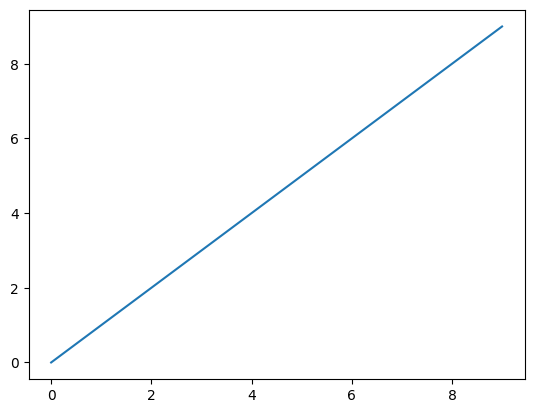

In [2]:
import matplotlib.pylab as plt
plt.plot(range(0, 10))

The following should generate an interactive plot

<IPython.core.display.Javascript object>


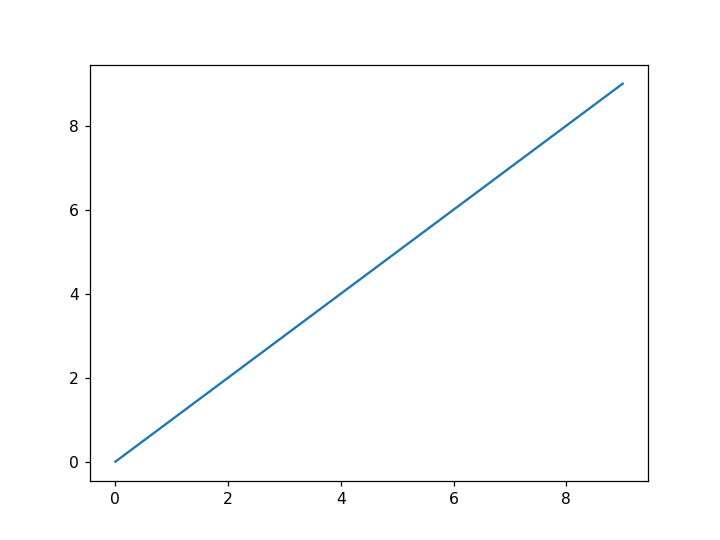

In [3]:
%matplotlib notebook
import matplotlib.pylab as plt
plt.plot(range(0, 10))

## ChipWhisperer Hardware Test

The following will connect to a ChipWhisperer. Just plug the Chipwhisperer main board in itself (black PCB or ChipWhisperer-Pro box), this isn't testing any of the attached target boards or similar. If the ChipWhisperer communication is up, everything else should "just work" when talking to various targets.

This should result in some text that says ``INFO: Found ChipWhisperer😍``

In [4]:
PLATFORM="NOTHING"
%run Setup_Scripts/Setup_Generic.ipynb

INFO: Found ChipWhisperer😍


We aren't going to use the hardware, so should disconnect from it so it is dropped by this Python kernel.

In [5]:
scope.dis()
target.dis()

## Bash / Command-Line Test

The following will check you have a working bash or command-line interface. We'll be using this for running ``make`` and other such commands.

In [6]:
%%bash
dir

0\ -\ Introduction\ to\ Jupyter\ Notebooks.ipynb  Test_Notebook.py
1\ -\ Connecting\ to\ Hardware.ipynb		  archive
ChipWhisperer\ Firmware\ Upgrade.ipynb		  asdf.txt
ChipWhisperer\ Setup\ Test.ipynb		  courses
ChipWhisperer\ Updating.ipynb			  demos
Helper_Scripts					  img
README.md					  requirements.txt
Setup_Scripts					  tests
Test_Notebook.ipynb				  user


In [7]:
!dir

 Volume in drive C has no label.
 Volume Serial Number is 6280-2456

 Directory of C:\Users\Leonard\ChipWhisperer5_64\cw\home\portable\chipwhisperer\jupyter

20/11/2023  15:43    <DIR>          .
20/11/2023  15:43    <DIR>          ..
20/11/2023  14:14    <DIR>          .git
16/01/2023  17:38               928 .gitignore
20/11/2023  14:03    <DIR>          .ipynb_checkpoints
16/01/2023  17:38            12,904 0 - Introduction to Jupyter Notebooks.ipynb
20/11/2023  15:43            31,934 1 - Connecting to Hardware.ipynb
20/11/2023  14:13    <DIR>          archive
16/01/2023  17:38                 0 asdf.txt
16/01/2023  17:38             1,500 ChipWhisperer Firmware Upgrade.ipynb
16/01/2023  17:38             6,963 ChipWhisperer Setup Test.ipynb
16/01/2023  17:38             5,237 ChipWhisperer Updating.ipynb
20/11/2023  14:13    <DIR>          courses
20/11/2023  14:13    <DIR>          demos
20/11/2023  14:13    <DIR>          Helper_Scripts
20/11/2023  14:13    <DIR>          img
16

**Remember that Jupyter allows running commands on your system - so exposing the web interface can be dangerous! This is one reason ChipWhisperer-Install on Windows uses a Token by default, and the VM forces you to set a password. Unless you have port forwarding your firewall should prevent access remotely, but if using this on a hostile network be sure you have not opened the port!**

## Compiler Testing

If you'll be building source code, you need a working Make system. First check you can run `make` - this should give you the normal output of 

In [8]:
!make --version

GNU Make 4.2.1
Built for Windows32
Copyright (C) 1988-2016 Free Software Foundation, Inc.
License GPLv3+: GNU GPL version 3 or later <http://gnu.org/licenses/gpl.html>
This is free software: you are free to change and redistribute it.
There is NO WARRANTY, to the extent permitted by law.


If you are using any of the following, you will need the `arm-none-eabi-gcc` compiler:

* ChipWhisperer-Lite 32-bit (with Arm Target).
* ChipWhisperer UFO Board with any Arm target (such as STM32F3, STM32F0, etc).
* ChipWhisperer-Nano

You can easily check for the working compiler with the following, which sohuld print the version and build information:

In [9]:
!arm-none-eabi-gcc -v

Using built-in specs.
COLLECT_GCC=arm-none-eabi-gcc
COLLECT_LTO_WRAPPER=c:/users/leonard/chipwh~1/cw/home/portable/armgcc/bin/../lib/gcc/arm-none-eabi/10.2.1/lto-wrapper.exe
Target: arm-none-eabi
Configured with: /mnt/workspace/workspace/GCC-10-pipeline/jenkins-GCC-10-pipeline-48_20201124_1606180641/src/gcc/configure --build=x86_64-linux-gnu --host=i686-w64-mingw32 --target=arm-none-eabi --prefix=/mnt/workspace/workspace/GCC-10-pipeline/jenkins-GCC-10-pipeline-48_20201124_1606180641/install-mingw --libexecdir=/mnt/workspace/workspace/GCC-10-pipeline/jenkins-GCC-10-pipeline-48_20201124_1606180641/install-mingw/lib --infodir=/mnt/workspace/workspace/GCC-10-pipeline/jenkins-GCC-10-pipeline-48_20201124_1606180641/install-mingw/share/doc/gcc-arm-none-eabi/info --mandir=/mnt/workspace/workspace/GCC-10-pipeline/jenkins-GCC-10-pipeline-48_20201124_1606180641/install-mingw/share/doc/gcc-arm-none-eabi/man --htmldir=/mnt/workspace/workspace/GCC-10-pipeline/jenkins-GCC-10-pipeline-48_20201124_1606

If you are using any of the following, you will need the `avr-gcc` compiler:

* ChipWhisperer-Lite Classic (with XMEGA Target).
* ChipWhisperer UFO Board with XMEGA or AVR Target.
* ChipWhisperer-Lite 2-Part Version.

You can easily check for the working compiler with the following, which should print the version and build information:

In [10]:
!avr-gcc -v

Using built-in specs.
Reading specs from c:/users/leonard/chipwh~1/cw/home/portable/avrgcc/bin/../lib/gcc/avr/11.1.0/device-specs/specs-avr2
COLLECT_GCC=avr-gcc
COLLECT_LTO_WRAPPER=c:/users/leonard/chipwh~1/cw/home/portable/avrgcc/bin/../libexec/gcc/avr/11.1.0/lto-wrapper.exe
Target: avr
Configured with: ../configure --prefix=/omgwtfbbq/avr-gcc-11.1.0-x64-windows --target=avr --enable-languages=c,c++ --disable-nls --disable-libssp --disable-libada --with-dwarf2 --disable-shared --enable-static --enable-mingw-wildcard --enable-plugin --with-gnu-as --host=x86_64-w64-mingw32 --build=x86_64-pc-linux-gnu
Thread model: single
Supported LTO compression algorithms: zlib
gcc version 11.1.0 (GCC) 


## Conclusions

That's it! We've got a working ChipWhisperer system now. There are a few packages used in specific tutorials that could still be missing if you've done your own install, but the above should have validate all important system settings. Hopefully any of the "important to setup" stuff should have been shaken out already.